# 项目：调查数据集（足球数据库！）

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

在这段报告中, 主要针对足球数据库进行分析, 其中包含Player_Attributes, Player, Match, League, Country, Team, Team_Attributes表. 在数据整理完成后, 我们将集中对2010/2011赛季的数据进行分析, 并统计此赛季评分最高的球员与球员巅峰状态评估.
注意: 由于在数据库文件超过Github上载限制, 当在第一次执行此notebook时, 自动下载数据库文件到当前workspace目录, 此操作需要大致250-300M磁盘空间大小.

<pre>
表结构分析:
TABLE "Player_Attributes":
	`id`	INTEGER PRIMARY KEY AUTOINCREMENT,  # 球员属性ID(PK)
	`player_fifa_api_id`	INTEGER,            # 球员FIFA api ID(FK AS `Player`(`player_fifa_api_id`))
	`player_api_id`	INTEGER,                    # 球员api ID(FK AS `Player`(`player_api_id`))
	`date`	TEXT,                               # 日期(::DATE)
	`overall_rating`	INTEGER,                # 总体评分
	`potential`	INTEGER,                        # 潜力
	`preferred_foot`	TEXT,                   # 习惯用脚
	`attacking_work_rate`	TEXT,               # 攻击级别
	`defensive_work_rate`	TEXT,               # 防守级别
	`crossing`	INTEGER,                        # 传中
	`finishing`	INTEGER,                        # 射门
	`heading_accuracy`	INTEGER,                # 头球
	`short_passing`	INTEGER,                    # 短传
	`volleys`	INTEGER,                        # 抽射
	`dribbling`	INTEGER,                        # 盘带
	`curve`	INTEGER,                            # 弧线球
	`free_kick_accuracy`	INTEGER,            # 任意球
	`long_passing`	INTEGER,                    # 长传
	`ball_control`	INTEGER,                    # 控球
	`acceleration`	INTEGER,                    # 加速
	`sprint_speed`	INTEGER,                    # 速度
	`agility`	INTEGER,                        # 灵活
	`reactions`	INTEGER,                        # 反应
	`balance`	INTEGER,                        # 平衡
	`shot_power`	INTEGER,                    # 射门力量
	`jumping`	INTEGER,                        # 弹跳
	`stamina`	INTEGER,                        # 体力
	`strength`	INTEGER,                        # 强壮
	`long_shots`	INTEGER,                    # 远射
	`aggression`	INTEGER,                    # 侵略性
	`interceptions`	INTEGER,                    # 拦截
	`positioning`	INTEGER,                    # 站位
	`vision`	INTEGER,                        # 视野
	`penalties`	INTEGER,                        # 点球
	`marking`	INTEGER,                        # 盯人
	`standing_tackle`	INTEGER,                # 抢断
	`sliding_tackle`	INTEGER,                # 铲球
	`gk_diving`	INTEGER,                        # 守门扑救
	`gk_handling`	INTEGER,                    # 守门手控球
	`gk_kicking`	INTEGER,                    # 守门开球
	`gk_positioning`	INTEGER,                # 守门站位
	`gk_reflexes`	INTEGER,                    # 守门反应

TABLE `Player` :
	`id`	INTEGER PRIMARY KEY AUTOINCREMENT,    # 球员ID(PK)
	`player_api_id`	INTEGER UNIQUE,               # 球员api ID
	`player_name`	TEXT,                         # 球员名
	`player_fifa_api_id`	INTEGER UNIQUE,       # 球员fifa api id
	`birthday`	TEXT,                             # 生日(::DATE)
	`height`	INTEGER,                          # 身高
	`weight`	INTEGER                           # 体重

TABLE `Match` :
	`id`	INTEGER PRIMARY KEY AUTOINCREMENT,    # 比赛ID(PK)
	`country_id`	INTEGER,                      # 国家ID(FK AS `country`(`id`))
	`league_id`	INTEGER,                          # 联盟ID(FK AS `League`(`id`))
	`season`	TEXT,                             # 赛季
	`stage`	INTEGER,                              # 场次
	`date`	TEXT,                                 # 日期(::DATE)
	`match_api_id`	INTEGER UNIQUE,               # 比赛api ID
	`home_team_api_id`	INTEGER,                  # 主场队api ID(FK AS `Team`(`team_api_id`))
	`away_team_api_id`	INTEGER,                  # 客场队api ID(FK AS `Team`(`team_api_id`))
	`home_team_goal`	INTEGER,                  # 主场队进球数
	`away_team_goal`	INTEGER,                  # 客场队进球数
	`home_player_1`	INTEGER,                      # 主场队球员1(FK AS `Player`(`player_api_id`))
	`home_player_2`	INTEGER,                      # 主场队球员2(FK AS `Player`(`player_api_id`))
	`home_player_3`	INTEGER,                      # 主场队球员3(FK AS `Player`(`player_api_id`))
	`home_player_4`	INTEGER,                      # 主场队球员4(FK AS `Player`(`player_api_id`))
	`home_player_5`	INTEGER,                      # 主场队球员5(FK AS `Player`(`player_api_id`))
	`home_player_6`	INTEGER,                      # 主场队球员6(FK AS `Player`(`player_api_id`))
	`home_player_7`	INTEGER,                      # 主场队球员7(FK AS `Player`(`player_api_id`))
	`home_player_8`	INTEGER,                      # 主场队球员8(FK AS `Player`(`player_api_id`))
	`home_player_9`	INTEGER,                      # 主场队球员9(FK AS `Player`(`player_api_id`))
	`home_player_10`	INTEGER,                  # 主场队球员10(FK AS `Player`(`player_api_id`))
	`home_player_11`	INTEGER,                  # 主场队球员11(FK AS `Player`(`player_api_id`))
	`away_player_1`	INTEGER,                      # 客场队球员1(FK AS `Player`(`player_api_id`))
	`away_player_2`	INTEGER,                      # 客场队球员2(FK AS `Player`(`player_api_id`))
	`away_player_3`	INTEGER,                      # 客场队球员3(FK AS `Player`(`player_api_id`))
	`away_player_4`	INTEGER,                      # 客场队球员4(FK AS `Player`(`player_api_id`))
	`away_player_5`	INTEGER,                      # 客场队球员5(FK AS `Player`(`player_api_id`))
	`away_player_6`	INTEGER,                      # 客场队球员6(FK AS `Player`(`player_api_id`))
	`away_player_7`	INTEGER,                      # 客场队球员7(FK AS `Player`(`player_api_id`))
	`away_player_8`	INTEGER,                      # 客场队球员8(FK AS `Player`(`player_api_id`))
	`away_player_9`	INTEGER,                      # 客场队球员9(FK AS `Player`(`player_api_id`))
	`away_player_10`	INTEGER,                  # 客场队球员10(FK AS `Player`(`player_api_id`))
	`away_player_11`	INTEGER,                  # 客场队球员11(FK AS `Player`(`player_api_id`))
	`goal`	TEXT,                                 # 进球数
	`shoton`	TEXT,                             # 射正
	`shotoff`	TEXT,                             # 射偏
	`foulcommit`	TEXT,                         # 犯规
	`card`	TEXT,                                 # 罚牌
	`cross`	TEXT,                                 # 传球
	`corner`	TEXT,                             # 角球
	`possession`	TEXT,                         # 控球权

TABLE `League` :
	`id`	INTEGER PRIMARY KEY AUTOINCREMENT,                  # 联盟ID(PK)
	`country_id`	INTEGER,                                    # 国家ID(FK AS `country`(`id`))
	`name`	TEXT UNIQUE,                                        # 联盟名

TABLE `Country` :
	`id`	INTEGER PRIMARY KEY AUTOINCREMENT,                  # 国家ID(PK)
	`name`	TEXT UNIQUE                                         # 国家名

TABLE "Team" :
	`id`	INTEGER PRIMARY KEY AUTOINCREMENT,                  # 团队ID(PK)
	`team_api_id`	INTEGER UNIQUE,                             # 团队api ID
	`team_fifa_api_id`	INTEGER,                                # 团队FIFA api ID
	`team_long_name`	TEXT,                                   # 团队名全称
	`team_short_name`	TEXT                                    # 团队名缩写

TABLE `Team_Attributes` :
	`id`	INTEGER PRIMARY KEY AUTOINCREMENT,                 # 团队属性ID(PK)
	`team_fifa_api_id`	INTEGER,                               # 团队FIFA api ID(FK AS `Team`(`team_fifa_api_id`))
	`team_api_id`	INTEGER,                                   # 团队api ID(FK AS `Team`(`team_api_id`))
	`date`	TEXT,                                              # 日期(::DATE)
	`buildUpPlaySpeed`	INTEGER,                               # 进攻速度
	`buildUpPlaySpeedClass`	TEXT,                              # 进攻类型
	`buildUpPlayDribbling`	INTEGER,                           # 盘带
	`buildUpPlayDribblingClass`	TEXT,                          # 盘带类型
	`buildUpPlayPassing`	INTEGER,                           # 传球
	`buildUpPlayPassingClass`	TEXT,                          # 传球类型
	`buildUpPlayPositioningClass`	TEXT,                      # 队形
	`chanceCreationPassing`	INTEGER,                           # 进攻传球
	`chanceCreationPassingClass`	TEXT,                      # 进攻传球类型
	`chanceCreationCrossing`	INTEGER,                       # 进攻传中
	`chanceCreationCrossingClass`	TEXT,                      # 进攻传中类型
	`chanceCreationShooting`	INTEGER,                       # 进攻射门
	`chanceCreationShootingClass`	TEXT,                      # 进攻射门类型
	`chanceCreationPositioningClass`	TEXT,                  # 进攻队形
	`defencePressure`	INTEGER,                               # 防守压力
	`defencePressureClass`	TEXT,                              # 防守压力类型
	`defenceAggression`	INTEGER,                               # 防守侵略
	`defenceAggressionClass`	TEXT,                          # 防守侵略类型
	`defenceTeamWidth`	INTEGER,                               # 防守覆盖宽度
	`defenceTeamWidthClass`	TEXT,                              # 防守覆盖宽度类型
	`defenceDefenderLineClass`	TEXT,                          # 防守后防线类型
</pre>

In [287]:
# import pkgs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import re
import os
import sys
import requests
from datetime import datetime

# 务必包含一个‘咒语’，以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问这个网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
# some magics
% matplotlib inline


<a id='wrangling'></a>
## 数据整理

> **提示**：在这一段报告中载入数据，检查简洁度，然后整理和清理数据集，以进行分析。务必将步骤仔细归档，并确定清理决策是否正确。

### 常规属性

In [288]:
###############################################################
# init datafile
db_dir = './data'
db_name = 'database.sqlite'
db_file = '{}/{}'.format(db_dir, db_name)
db_url = 'https://s3.cn-north-1.amazonaws.com.cn/static-documents/nd101/explore+dataset/database.sqlite'

# download database file
def download(url, db_dir, db_name, prt_flag = False):
    if db_name in os.listdir(db_dir):
        if prt_flag:
            sys.stdout.write('File Existed.!\n')
            sys.stdout.flush()

    else:
        if prt_flag:
            sys.stdout.write('Start Download File\n')
            sys.stdout.flush()

        r = requests.get(url) 
        with open(self.db_file, "wb") as code:
            code.write(r.content)
            if prt_flag:
                sys.stdout.write('.')
                sys.stdout.flush()

        if prt_flag:     
            sys.stdout.write('\nEnd Download File\n')
            sys.stdout.flush()
            
download(db_url, db_dir, db_name)
###############################################################

In [289]:
###############################################################
# get all the tables from the database
conn = sqlite3.connect(db_file)
t_names = pd.read_sql("select * from sqlite_master", conn)['name']

# it seems pandas messes up with the tables, we should recollect them
data = {}
for t_name in t_names:
    try:
        table = pd.read_sql("select * from %s"%(t_name), conn)
        data[t_name] = table
    except:
        pass

del data['sqlite_sequence']
# check available tables
print("\nSUCCESSFULLY loaded tables: ")
print(data.keys())
###############################################################


SUCCESSFULLY loaded tables: 
dict_keys(['Player_Attributes', 'Player', 'Match', 'League', 'Country', 'Team', 'Team_Attributes'])


In [290]:
###############################################################
# load to dataframe
df_player = data['Player']
df_player_attributes = data['Player_Attributes']
df_match = data['Match']
df_league = data['League']
df_country = data['Country']
df_team = data['Team']
df_team_attributes = data['Team_Attributes']
###############################################################

In [291]:
###############################################################
# 整理数据
# Check Player_Attributes values
# 将overall_rating评分为空的行删除(总体评分为空, 视为未参加比赛)
print(df_player_attributes[ df_player_attributes['overall_rating'].isnull() ].head() )
print('before : {}'.format(sum(df_player_attributes['overall_rating'].isnull())))
df_player_attributes.drop(df_player_attributes[ df_player_attributes['overall_rating'].isnull() ].index, \
                              inplace = True)
print('after : {}'.format(sum(df_player_attributes['overall_rating'].isnull())))

# 如果volleys为空, 则置为0(将没有抽射的球员属性置为零)
print(df_player_attributes[ df_player_attributes['volleys'].isnull() ].head() )
print('before : {}'.format(sum(df_player_attributes['volleys'].isnull())))
df_player_attributes['volleys'] = df_player_attributes['volleys'].fillna(0)
print('after : {}'.format(sum(df_player_attributes['volleys'].isnull())))

# 如果curve为空, 则置为0(将没有盘带的球员属性值为零)
print(df_player_attributes[ df_player_attributes['curve'].isnull() ].head() )
print('before : {}'.format(sum(df_player_attributes['curve'].isnull())))
df_player_attributes['curve'] = df_player_attributes['curve'].fillna(0)
print('after : {}'.format(sum(df_player_attributes['curve'].isnull())))

# 将agility为空的行删除(灵活评分为空, 视为未参加比赛)
print(df_player_attributes[ df_player_attributes['agility'].isnull() ].head() )
print('before : {}'.format(sum(df_player_attributes['agility'].isnull())))
df_player_attributes.drop(df_player_attributes[ df_player_attributes['agility'].isnull() ].index, \
                              inplace = True)
print('after : {}'.format(sum(df_player_attributes['agility'].isnull())))
###############################################################


        id  player_fifa_api_id  player_api_id                 date  \
483    484               33022          31684  2007-02-22 00:00:00   
983    984              111085          29904  2007-02-22 00:00:00   
1752  1753              165740          24159  2007-02-22 00:00:00   
2089  2090              176941          31916  2007-02-22 00:00:00   
2482  2483              177615          37249  2007-02-22 00:00:00   

      overall_rating  potential preferred_foot attacking_work_rate  \
483              NaN        NaN           None                None   
983              NaN        NaN           None                None   
1752             NaN        NaN           None                None   
2089             NaN        NaN           None                None   
2482             NaN        NaN           None                None   

     defensive_work_rate  crossing     ...       vision  penalties  marking  \
483                 None       NaN     ...          NaN        NaN      NaN   


In [292]:
###############################################################
# Check Match values
# 如果有比赛有球员位置空缺, 视为此比赛无效, 删除此行数据
home_player_list = [ 'home_player_{}'.format(x) for x in range(1, 12) ]
away_player_list = [ 'away_player_{}'.format(x) for x in range(1, 12) ]
player_list = home_player_list + away_player_list
# print(player_list)
for player in player_list:
    print('before : {}'.format(sum(df_match[player].isnull())))
    df_match.drop(df_match[ df_match[player].isnull() ].index, \
                                  inplace = True)
    print('after : {}'.format(sum(df_match[player].isnull())))

###############################################################

before : 1224
after : 0
before : 380
after : 0
before : 273
after : 0
before : 249
after : 0
before : 180
after : 0
before : 173
after : 0
before : 145
after : 0
before : 149
after : 0
before : 106
after : 0
before : 202
after : 0
before : 190
after : 0
before : 109
after : 0
before : 120
after : 0
before : 125
after : 0
before : 126
after : 0
before : 106
after : 0
before : 101
after : 0
before : 103
after : 0
before : 116
after : 0
before : 124
after : 0
before : 139
after : 0
before : 165
after : 0


In [293]:
###############################################################
# Check Team_Attributes values
# buildUpPlayDribbling为空时视为数据无效(参加比赛的队伍不可能没有盘带就比赛结束)
print(df_team_attributes[ df_team_attributes['buildUpPlayDribbling'].isnull() ].head() )
print('before : {}'.format(sum(df_team_attributes['buildUpPlayDribbling'].isnull())))
df_team_attributes.drop(df_team_attributes[ df_team_attributes['buildUpPlayDribbling'].isnull() ].index, \
                              inplace = True)
print('after : {}'.format(sum(df_team_attributes['buildUpPlayDribbling'].isnull())))

###############################################################

   id  team_fifa_api_id  team_api_id                 date  buildUpPlaySpeed  \
0   1               434         9930  2010-02-22 00:00:00                60   
3   4                77         8485  2010-02-22 00:00:00                70   
4   5                77         8485  2011-02-22 00:00:00                47   
5   6                77         8485  2012-02-22 00:00:00                58   
6   7                77         8485  2013-09-20 00:00:00                62   

  buildUpPlaySpeedClass  buildUpPlayDribbling buildUpPlayDribblingClass  \
0              Balanced                   NaN                    Little   
3                  Fast                   NaN                    Little   
4              Balanced                   NaN                    Little   
5              Balanced                   NaN                    Little   
6              Balanced                   NaN                    Little   

   buildUpPlayPassing buildUpPlayPassingClass           ...             \


> **提示**：_不应_在每个框中进行太多操作。可以自由创建框，进行数据探索。在这个项目中，可以在初始 notebook 中进行大量探索操作。不要求对其进行组织，但务必仔细阅读备注，理解每个代码框的用途。完成分析之后，可以创建 notebook 副本，在其中去除多余数据，组织步骤，从而形成结构连贯、紧密的报告。

> **提示**：务必向你的读者告知你在调查中采取的步骤。在每个代码框或每组相关代码框后面，用 markdown 框对前面的框中的调查结果向读者进行说明。尽量做到这一点，以便读者理解后续框中的内容。

### 数据清理（用更具体的标题代替这个标题！）

In [294]:
###############################################################
# 讨论数据结构和需要解决的任何问题之后，
#   在本段的第二部分进行这些清理步骤。
# Set defensive_work_rate = '_0' to 0(将defensive_work_rate = '_0'的数据修改为0)
print(df_player_attributes[ df_player_attributes['defensive_work_rate'] == '_0' ].head() )
print('before : {}'.format(sum(df_player_attributes['defensive_work_rate'] == '_0')))
df_player_attributes.loc[df_player_attributes['defensive_work_rate'] == '_0'] = 0
print('after : {}'.format(sum(df_player_attributes['defensive_work_rate'] == '_0')))
###############################################################

      id  player_fifa_api_id  player_api_id                 date  \
373  374              156626          46447  2010-08-30 00:00:00   
374  375              156626          46447  2010-02-22 00:00:00   
375  376              156626          46447  2008-08-30 00:00:00   
376  377              156626          46447  2007-08-30 00:00:00   
377  378              156626          46447  2007-02-22 00:00:00   

     overall_rating  potential preferred_foot attacking_work_rate  \
373            64.0       71.0          right                None   
374            64.0       71.0          right                None   
375            66.0       71.0          right                None   
376            68.0       75.0          right                None   
377            66.0       65.0          right                None   

    defensive_work_rate  crossing     ...       vision  penalties  marking  \
373                  _0      41.0     ...         61.0       39.0     62.0   
374                 

<a id='eda'></a>
## 探索性数据分析

> **提示**：整理和清理数据之后，现在可以进行探索。计算统计值，创建视图，解决你在简介段提出的研究问题。建议采用系统化方法。一次探索一个变量，然后探索变量之间的关系。

### 研究问题 1（2010-2011赛季表现评分最高的球员, 评分与国家.）

before : player    61916
dtype: int64
after : player    3915
dtype: int64


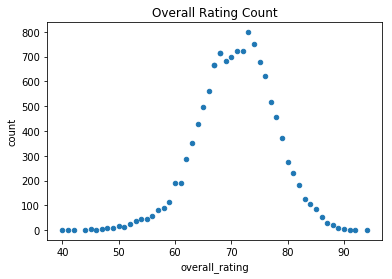

In [295]:
###############################################################
# 找出2010/2011赛季评分最高的球员
# Get all players for season 2010/2011
df_match_2010to2011 = df_match[ df_match['season'] == '2010/2011' ]
flag = True
pre = 0
for player in player_list:
    if flag:
        df_tmp = pd.DataFrame(df_match_2010to2011, columns = [ player ])
        df_tmp.columns = ['player']
        df_match_players = df_tmp
        flag = False
        
    df_tmp = pd.DataFrame(df_match_2010to2011, columns = [ player ])
    df_tmp.columns = ['player']
    df_match_players = df_match_players.append(df_tmp)

# Drop duplicates
print('before : {}'.format(df_match_players.count()))
df_match_players.drop_duplicates(inplace = True)
print('after : {}'.format(df_match_players.count()))
df_match_players['player'] = df_match_players['player'].astype(int)

# Get all player's attributes in df_match_players
df_player_attributes['date'] = pd.to_datetime(df_player_attributes['date'])
flag = True
start = datetime(2010, 1, 1)
end = datetime(2011, 12, 31)
for player_api_id in df_match_players['player']:
    if flag:
        df_tmp = df_player_attributes[(df_player_attributes[ 'player_api_id' ] == player_api_id )  & \
                                          (df_player_attributes[ 'date' ]  >= start) & \
                                          (df_player_attributes[ 'date' ] <= end)]
        df_match_player_attributes = df_tmp
        flag = False
        
    df_tmp = df_player_attributes[(df_player_attributes[ 'player_api_id' ] == player_api_id )  & \
                                      (df_player_attributes[ 'date' ]  >= start) & \
                                      (df_player_attributes[ 'date' ] <= end)]
    df_match_player_attributes = df_match_player_attributes.append(df_tmp)
    
# Plot overall_rating with count
df_rating = pd.DataFrame(df_match_player_attributes, columns = ['overall_rating'])
df_rating['overall_rating'] = df_rating['overall_rating'].drop_duplicates()
df_rating.dropna(inplace = True)
flag = True
count_list = []
for rating in df_rating['overall_rating']:
    count_list.append(df_match_player_attributes[ df_match_player_attributes[ 'overall_rating' ] == \
                                                     rating ]['player_api_id'].count())
        
df_rating['count'] = count_list
df_rating['overall_rating'] = df_rating['overall_rating'].astype(int)
df_rating.plot(kind = 'scatter', x = 'overall_rating', y = 'count', title = 'Overall Rating Count')

# 通过图形分析, 不难发现, 球员评分普遍在70-75之间, 在这里我们需要找到最右侧的最高分.
    

In [296]:
# Get max overall_rating data
df_max_overall_rating = df_match_player_attributes[ df_match_player_attributes[ 'overall_rating' ] == \
                                                       df_match_player_attributes[ 'overall_rating' ].max() ]
max_rating = df_max_overall_rating.overall_rating.iloc[0]
print('max_overall_rating : {}'.format(max_rating))

# Get max_overall_rating's player_api_id
max_player_api_id = df_max_overall_rating.player_api_id.iloc[0]
max_player_name = df_player[ df_player[ 'player_api_id' ] == max_player_api_id ].player_name.iloc[0]
print('max_player_name : {}'.format(max_player_name))

# Get max_overall_rating player's team_api_id
try:
    max_team_api_id = df_match_2010to2011.query('home_player_1 == {} or \
                            home_player_2 == {} or \
                            home_player_3 == {} or \
                            home_player_4 == {} or \
                            home_player_5 == {} or \
                            home_player_6 == {} or \
                            home_player_7 == {} or \
                            home_player_8 == {} or \
                            home_player_9 == {} or \
                            home_player_10 == {} or \
                            home_player_11 == {}'.format( max_player_api_id, \
                                          max_player_api_id, \
                                          max_player_api_id, \
                                          max_player_api_id, \
                                          max_player_api_id, \
                                          max_player_api_id, \
                                          max_player_api_id, \
                                          max_player_api_id, \
                                          max_player_api_id, \
                                          max_player_api_id, \
                                          max_player_api_id
                            )).head(1).home_team_api_id.iloc[0]
    
except:
    max_team_api_id = df_match_2010to2011.query('away_player_1 == {} or \
                        away_player_2 == {} or \
                        away_player_3 == {} or \
                        away_player_4 == {} or \
                        away_player_5 == {} or \
                        away_player_6 == {} or \
                        away_player_7 == {} or \
                        away_player_8 == {} or \
                        away_player_9 == {} or \
                        away_player_10 == {} or \
                        away_player_11 == {}'.format( max_player_api_id, \
                                      max_player_api_id, \
                                      max_player_api_id, \
                                      max_player_api_id, \
                                      max_player_api_id, \
                                      max_player_api_id, \
                                      max_player_api_id, \
                                      max_player_api_id, \
                                      max_player_api_id, \
                                      max_player_api_id, \
                                      max_player_api_id
                        )).head(1).away_team_api_id.iloc[0]
    
# df_max_team_api_id.head()
print('max_team_api_id : {}'.format(max_team_api_id))

# Get team long name
max_team_name = df_team[ df_team[ 'team_api_id' ] == max_team_api_id ].team_long_name.iloc[0]
print('max_team_name : {}'.format(max_team_name))

# print result
result = '{}\t{}\t{}'.format(max_player_name, max_rating, max_team_name)
sys.stdout.write('Player\t\tRating\tTeam\n{}'.format(result))
###############################################################

max_overall_rating : 94.0
max_player_name : Lionel Messi
max_team_api_id : 8634
max_team_name : FC Barcelona
Player		Rating	Team
Lionel Messi	94.0	FC Barcelona

### 研究问题 2（针对上一题的结果, 分析此球员近年的总体评分走势, 哪一年是此运动员的巅峰.）

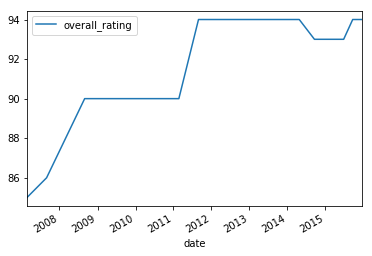

In [297]:
###############################################################
# 分析此运动员的评分动态
df_messi_rating = df_player_attributes[ df_player_attributes[ 'player_api_id' ] == \
                                            max_player_api_id ]
df_plot = pd.DataFrame(df_messi_rating, columns = ['date', 'overall_rating'])
df_plot.set_index('date').plot()
###############################################################

<a id='conclusions'></a>
## 结论

> **提示**：最后，总结你的调查结果。确保了解探索结果的限制。如果尚未进行任何统计检验，不要做出任何统计结论。切记不要根据相互关系推导出因果关系！

> **提示**：如果对报告满意，应将其副本保存为 HTML 或 PDF 形式。导出报告之前请检查一遍，确保报告流程完整。应删除所有类似的“提示”引用段，以保持报告简洁。还需要查看课程结尾的项目提交页的项目审阅规范。

> 如需将报告导出到工作区，应运行下面的代码框。如果正确，会返回代码 0，工作区目录下会生成 .html 文件（单击左上角的 jupyter 图标）。也可以通过 **文件** > **下载为** 子菜单下载 html 报告，然后手动上传到工作区目录。完成之后，可以单击右下角的“提交项目”，提交你的项目。恭喜！

2010/2011赛季, 评分表现最佳的球员为FC Barcelona队的Lionel Messi, 评分为94.
此运动员的巅峰时期为2012-2014年, 最佳评分为94.

In [298]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1